<p><img alt="Colaboratory logo" height="140px" src="https://upload.wikimedia.org/wikipedia/commons/archive/f/fb/20161010213812%21Escudo-UdeA.svg" align="left" hspace="10px" vspace="0px"></p>

# **Curso de bases para AI - Universidad de Antioquia**


El presente curso hace parte del centro de Big Data de la facultad de ciencias exactas y naturales (FCEN) de la Universidad de Antioquia.

\

El curso será dictado en 16 sesiones o clases de 4 horas los días sábado en las instalaciones de la universidad. Para un total de dededicación temporal de 64 horas. El curso cuenta con los siguientes módulos:

1. Bases matemáticas y de programación. (10H)
2. Bases de Python. (19H)
3. Bases de R. (13H)
4. Procesamiento de datos. (22H)

In [0]:
import pandas as pd
import numpy as np

#**Agregación de datos:**

Por agregación se entiende varios tipos de tranformaciones que producen un valor escalar a partir de un arreglo. En los métodos que usamos junto a `groupby`vimos muchos de ellos como `sum`, `count`, `min`, `max`, etc. Algunos de ellos se describen en la siguiente tabla:

| Función | Descripción |
| --- | --- |
| `count` | Determina el número de elementos diferentes a `NaN` |
| `sum` | Suma elementos diferentes a `NaN` |
| `mean` | Media de elementos diferentes a `NaN` |
| `std, var` | Desviación estandar y Varianza |
| `min, max` | Valores mínimos y máximos |
| `count` | Producto de los valores distinto a `NaN` |
| `first, last` | Primer y último elementos distintos a `NaN` |

Veamos una applicación de estas funciones mediante el método `agg`. Para ello, vamos a usar un dataset de `kaggle` de 'Animal Crossing', un video juego de simulación social de Nintendo. El dataset que usaremos se llama 'items.csv' el cual contine información sobre aldeanos, articulos, manualidades, accesorios, etc.

In [0]:
dfA = pd.read_csv('https://raw.githubusercontent.com/diplomado-bigdata-machinelearning-udea/curso0/master/s08/datasets/items.csv')

In [0]:
dfA.head()

,num_id,id,name,category,orderable,sell_value,sell_currency,buy_value,buy_currency,sources,customizable,recipe,recipe_id,games_id,id_full,image_url
0,12,3d-glasses,3D Glasses,Accessories,NaN,122.0,bells,490.0,bells,NaN,NaN,NaN,NaN,nh,item-3d-glasses,https://villagerdb.com/images/items/full/3d-gl...
1,14,a-tee,A Tee,Tops,NaN,140.0,bells,560.0,bells,NaN,NaN,NaN,NaN,nh,item-a-tee,https://villagerdb.com/images/items/full/a-tee...
2,17,abstract-wall,Abstract Wall,Wallpaper,True,390.0,bells,1560.0,bells,Nook's Cranny,NaN,NaN,NaN,nh,NaN,NaN
3,19,academy-uniform,Academy Uniform,Dresses,NaN,520.0,bells,2080.0,bells,NaN,NaN,NaN,NaN,nh,item-academy-uniform,https://villagerdb.com/images/items/full/acade...
4,20,acanthostega,Acanthostega,Fossils,False,2000.0,bells,NaN,NaN,Underground (dig spot),NaN,NaN,NaN,nh,item-acanthostega,https://villagerdb.com/images/items/thumb/acan...


Este dataset contiene muchos datos faltantes, sin embargo, no trataremos el dataset con el fin de ver el efecto de estos datos faltantes en las diferentes funciones que aplicaremos de forma "agregada".

In [0]:
dfA.isnull().sum()

num_id              0
id                  0
name                0
category            0
orderable        2775
sell_value         36
sell_currency      36
buy_value        1014
buy_currency     1014
sources          3663
customizable     3992
recipe           3977
recipe_id        3977
games_id            0
id_full          1528
image_url        1528
dtype: int64

Realicemos un agrupamiento por categorias de los productos y hallemos el valor medio:

In [0]:
dfA.groupby(['category']).agg('mean')

,num_id,sell_value,buy_value,recipe
category,,,,
Accessories,3520.260163,637.284553,1911.754386,4.250000
Bottoms,3540.633803,298.345070,1197.943262,7.000000
Bugs,3591.875000,2220.500000,10510.877193,NaN
Dresses,3582.615063,1114.058577,3803.788546,4.470588
Fish,3024.148515,3808.811881,NaN,NaN
Flooring,3798.719136,1275.447205,3833.393333,4.405405
Flowers,4946.220183,120.754717,160.000000,NaN
Fossils,3467.815789,3502.631579,NaN,NaN
Fruit,2808.666667,125.000000,400.000000,NaN


Nótese que esta operación se realiza solo en las columnas numéricas:

In [0]:
numerics = ['int64','float64']
dfA.select_dtypes(include=numerics)

,num_id,sell_value,buy_value,recipe
0,12,122.0,490.0,NaN
1,14,140.0,560.0,NaN
2,17,390.0,1560.0,NaN
3,19,520.0,2080.0,NaN
4,20,2000.0,NaN,NaN
...,...,...,...,...
4560,7425,240.0,960.0,NaN
4561,7428,250.0,1000.0,NaN
4562,7441,1075.0,4300.0,NaN
4563,7442,10.0,40.0,NaN


No obstante, una función `count` si que puede realizar un conteo sobre cada uno de los items.

In [0]:
dfA.groupby(['category']).agg(['count'])

,num_id,id,name,orderable,sell_value,sell_currency,buy_value,buy_currency,sources,customizable,recipe,recipe_id,games_id,id_full,image_url
,count,count,count,count,count,count,count,count,count,count,count,count,count,count,count
category,,,,,,,,,,,,,,,
Accessories,123,123,123,44,123,123,114,114,27,11,12,12,123,123,123
Bottoms,142,142,142,41,142,142,141,141,25,1,1,1,142,142,142
Bugs,80,80,80,80,80,80,57,57,23,0,0,0,80,80,80
Dresses,239,239,239,47,239,239,227,227,17,11,17,17,239,239,239
Fish,101,101,101,101,101,101,0,0,61,0,0,0,101,101,101
Flooring,324,324,324,125,322,322,300,300,95,33,37,37,324,0,0
Flowers,109,109,109,106,106,106,46,46,109,0,0,0,109,109,109
Fossils,76,76,76,76,76,76,0,0,76,0,0,0,76,76,76


Incluso puede pasarse en forma de lista, con diferentes funciones.

In [0]:
dfA.groupby(['category']).agg(['count','min','max','mean','first','last'])

num_id                           ... recipe                     
             count   min   max         mean  ...    max      mean first last
category                                     ...                            
Accessories    123    12  7270  3520.260163  ...   20.0  4.250000   6.0  5.0
Bottoms        142    24  7315  3540.633803  ...    7.0  7.000000   7.0  7.0
Bugs            80    46  7326  3591.875000  ...    NaN       NaN   NaN  NaN
Dresses        239    19  7424  3582.615063  ...    8.0  4.470588   8.0  3.0
Fish           101   102  7403  3024.148515  ...    NaN       NaN   NaN  NaN
Flooring       324    83  7398  3798.719136  ...   20.0  4.405405  15.0  3.0
Flowers        109   543  7377  4946.220183  ...    NaN       NaN   NaN  NaN
Fossils         76    20  6841  3467.815789  ...    NaN       NaN   NaN  NaN
Fruit           12   168  4772  2808.666667  ...    NaN       NaN   NaN  NaN
Furniture     1264    21  7421  3686.337025  ...   90.0  5.009828   8.0  3.0
Hats           230    28  7417  3744.713043  ...    5.0  2.128205   1.0  2.0
Music           95    40  7105  3629.400000  ...    NaN       NaN   NaN  NaN
Photos         840    32  7443  3444.902381  ...    NaN       NaN   NaN  NaN
Seashells        8  1440  6967  3990.750000  ...    NaN       NaN   NaN  NaN
Shoes           89   142  7441  4373.977528  ...    2.0  2.000000   2.0  2.0
Socks           60    35  7093  3973.483333  ...    NaN       NaN   NaN  NaN
Tools           74   266  7215  3572.216216  ...    7.0  2.818182   1.0  5.0
Tops           289    14  7425  3790.865052  ...    8.0  8.000000   8.0  8.0
Umbrellas       67   166  7174  3658.701493  ...   15.0  9.000000   7.0  7.0
Usables         88    30  7388  3867.534091  ...    6.0  4.000000   1.0  6.0
Wallpaper      255    17  7371  3525.447059  ...   20.0  7.076923   7.0  9.0

[21 rows x 24 columns]

##**Operación de agregación basadas en columnas**:

Supongamos qu queremos aplicar funciones diferentes a una o más columnas. Esto se puede hacer facilmente si pasamos un diccionario al método `agg` que contenga un mapa de los nombres de las columnas a cualquier funcion antes especificada:

In [0]:
dfA.groupby(['category']).agg({'sell_value':'count','buy_value':'std'})

,sell_value,buy_value
category,,
Accessories,123,4383.964797
Bottoms,142,462.801281
Bugs,80,14239.765282
Dresses,239,21158.961881
Fish,101,NaN
Flooring,322,10974.832136
Flowers,106,0.000000
Fossils,76,NaN
Fruit,12,0.000000


## **Retorno de datos agregados sin forma de indexado**:

Nótese que la función de `groupby` utiliza los valores únicos de la columna usada para hacer la agrupación y devolver una objeto cuyo índice son los valores de dicha columna. 

Si no queremos que esto ocurra, podemos especificar en el argumento de la función `as_index=False` para que no se realice este indexado:

In [0]:
dfA.groupby('category', as_index=False).mean()

,category,num_id,sell_value,buy_value,recipe
0,Accessories,3520.260163,637.284553,1911.754386,4.250000
1,Bottoms,3540.633803,298.345070,1197.943262,7.000000
2,Bugs,3591.875000,2220.500000,10510.877193,NaN
3,Dresses,3582.615063,1114.058577,3803.788546,4.470588
4,Fish,3024.148515,3808.811881,NaN,NaN
5,Flooring,3798.719136,1275.447205,3833.393333,4.405405
6,Flowers,4946.220183,120.754717,160.000000,NaN
7,Fossils,3467.815789,3502.631579,NaN,NaN
8,Fruit,2808.666667,125.000000,400.000000,NaN
9,Furniture,3686.337025,5386.694108,20256.035760,5.009828


##**Applicación de funciones propias**

Podemo también aplicar funciones propias usando el método `agg`. 

Definamos una función que calcule la distancia entre el valor máximo y el valor mínimo en un conjunto de datos:

In [0]:
def max_min_distance(datos):
  return datos.max()-datos.min()

In [0]:
dfA.groupby('category').agg({'buy_value':max_min_distance})

,buy_value
category,
Accessories,43160.0
Bottoms,4260.0
Bugs,47960.0
Dresses,319960.0
Fish,NaN
Flooring,139648.0
Flowers,0.0
Fossils,NaN
Fruit,0.0


### **Problema**:

Realice una agrupamiento mediante la columna `category` y realce:

- Una cuenta de los elementos de la columna `name`.
- Realice en las columnas 'sell_value' y 'buy_value' un conteo, una suma y el cálculo de la desviación estándar.

Nota: Asegúrese de no usar los valores de la variable `category` como índices del dataframe que construya.

In [0]:
#@title Solución al problema
dfA.groupby('category', as_index=False).agg({'name':'count','sell_value':['count','sum','std'],'buy_value':['count','sum','std']})

category  name sell_value  ... buy_value                           
                count      count  ...     count         sum            std
0   Accessories   123        123  ...       114    217940.0    4383.964797
1       Bottoms   142        142  ...       141    168910.0     462.801281
2          Bugs    80         80  ...        57    599120.0   14239.765282
3       Dresses   239        239  ...       227    863460.0   21158.961881
4          Fish   101        101  ...         0         0.0            NaN
5      Flooring   324        322  ...       300   1150018.0   10974.832136
6       Flowers   109        106  ...        46      7360.0       0.000000
7       Fossils    76         76  ...         0         0.0            NaN
8         Fruit    12         12  ...        10      4000.0       0.000000
9     Furniture  1264       1239  ...       783  15860476.0   40410.620819
10         Hats   230        229  ...       200   2933680.0  110829.805841
11        Music    95         95  ...        95    302800.0     123.117402
12       Photos   840        840  ...       840    465600.0     479.059184
13    Seashells     8          8  ...         0         0.0            NaN
14        Shoes    89         89  ...        81    288990.0   17659.890288
15        Socks    60         60  ...        60     39790.0     202.471941
16        Tools    74         74  ...         8      5300.0     219.983766
17         Tops   289        288  ...       286    373354.0     815.908200
18    Umbrellas    67         67  ...        64    109820.0    2083.171970
19      Usables    88         85  ...         3     37400.0   20380.709834
20    Wallpaper   255        254  ...       236   1285700.0   16881.447445

[21 rows x 8 columns]

#**Operaciones de funciones en dataframes**

De forma general, podemos aplicar cualquier operación (permitida), a lo largo de filas o columnas, mediante el método `apply`, que además **es vectorizado**.

Veamos esto mediante un ejemplo (con valores de un dataset inventados). 

Supongamos que la siguiente tabla representan las variaciones porcentuales promedio de ingresos en los hogares familiares a lo largo de varios meses en diferentes municipios



In [0]:
frame = pd.DataFrame(np.random.randn(200, 4), columns=['Medellin', 'Barbosa', 'Envigado', 'Bello'])

frame.head()

,Medellin,Barbosa,Envigado,Bello
0,0.541453,1.444165,-0.436671,0.571093
1,-0.485294,-1.193936,1.408452,-0.981463
2,-1.102855,-0.036092,0.985363,-0.685372
3,0.842940,0.456110,-1.395243,0.715043
4,-1.273586,-0.857475,0.704660,0.669829


Podríamos querer aplicar una cunción para determinar la distancia entre el valor mínimo y máximo de las variaciones porcencuales por municipio.

Para ello, creamos una función `lambda` que halle el máximo y el mínimo en una columna y los reste. Esta función `lambda` puede ser aplicada a lo largo de toda la columna mediante el método `apply`, para ello, especificámos el eje a lo largo del cual realizaremos la operación (`axis=0`):

In [0]:
f = lambda x: x.max() - x.min()

frame.apply(f, axis=0)

Medellin    6.344952
Barbosa     5.430940
Envigado    5.608825
Bello       4.198460
dtype: float64

Debemos se cuidadosos con la finalidad de las operaciones que realizamos. Si por algún motivo especificamos `axis = 1`, esto equivaldria a hallar la distancia entre las variaciones porcentuales promedio entre los municipios por mes (suponiendo que cada fila representa el mes):

In [0]:
frame.apply(f, axis=1)

0      1.880836
1      2.602388
2      2.088217
3      2.238183
4      1.978247
         ...   
195    1.251476
196    1.763421
197    0.772941
198    2.273027
199    1.022874
Length: 200, dtype: float64

No solo las operaciones definidas mediante la función `lambda` son validas. Si definimos, por ejemplo, una función que devuelva una serie con el valor mínimo y máximo por por columna y los visualicemos en una tabla:

In [0]:
def f(x):
  return pd.Series([x.min(), x.max()], index=['min', 'max'])

frame.apply(f)

,Medellin,Barbosa,Envigado,Bello
min,-3.086126,-2.723297,-2.919512,-2.023889
max,3.258826,2.707643,2.689313,2.174572


Pordemos usar, por ejemplo, la función `applymap`  para darle formato a los datos de nuestros elementos del dataframe mediante una función que implique un mapeo:

In [0]:
format = lambda x: '%.2f' % x
frame.applymap(format)

,Medellin,Barbosa,Envigado,Bello
0,0.54,1.44,-0.44,0.57
1,-0.49,-1.19,1.41,-0.98
2,-1.10,-0.04,0.99,-0.69
3,0.84,0.46,-1.40,0.72
4,-1.27,-0.86,0.70,0.67
...,...,...,...,...
195,0.57,-0.68,-0.07,0.49
196,-0.97,0.06,0.78,0.80
197,-0.28,-0.03,0.02,0.49
198,1.11,0.77,-0.16,-1.16


O aplicarla directamente a una sola columna:

In [0]:
frame['Envigado'].map(format)

0      -0.44
1       1.41
2       0.99
3      -1.40
4       0.70
       ...  
195    -0.07
196     0.78
197     0.02
198    -0.16
199     0.56
Name: Envigado, Length: 200, dtype: object

**Problema:**

Realice una función de normalización de los datos de dataframe anterío entre 0 y 1. 

**Ayuda:** Use la ecuación de normalización:

$x_{norm}=\frac{x-x_{min}}{x_{max}-x_{min}}$

In [0]:
#@title Solución al ejercicio

frame.apply(lambda x: (x-x.min())/(x.max()-x.min()))

,Medellin,Barbosa,Envigado,Bello
0,0.571727,0.767356,0.442667,0.618079
1,0.409906,0.281601,0.771635,0.248288
2,0.312575,0.494796,0.696202,0.318811
3,0.619243,0.585425,0.271763,0.652366
4,0.285666,0.343554,0.646155,0.641596
...,...,...,...,...
195,0.576153,0.375875,0.508355,0.599716
196,0.334098,0.512099,0.658875,0.671917
197,0.441733,0.495962,0.524720,0.598667
198,0.661117,0.642370,0.491298,0.204715


#Matplotlib
Hasta el momento hemos trabajado con los datos, y hemos podido hacer un análisis de estos sacando conclusiones con la ayuda de lasseries y bases de datos de Pandas. Ahora exploraremos otra herramienta que nos permitirá obtener informacion de manera concisa, esta es Matplotlib.

Matplotlib es una librería para crear visualizaciones estáticas, animadas e interactivas en Python. Esta puede ser una de los módulos que más posibilidades puede ofrecernos Python, por lo que daremos un enfoque más aplicado para trabajarlo.

Como cualquier módulo lo primero es importarlo.

In [0]:
import matplotlib.pyplot as plt
import numpy as np


Empezaremos con un ejemplo sencillo que nos permita entender un poco la dinámica de este módulo. Pensaremos en 2 listas, una de edades y otra en salario medio devengado en millones

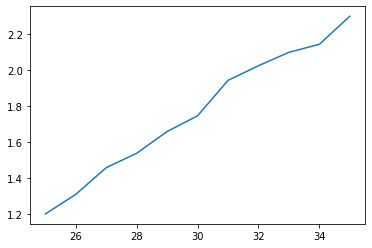

In [0]:
ages = [25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35]

dev_y = [1.2, 1.30922693, 1.45735661, 1.53740648, 1.65835411,
         1.74563591, 1.9425187 , 2.02394015, 2.09841022, 2.14301746,
         2.29900249]
plt.plot(ages,dev_y)
plt.show()

Este es en principio el resultado que obtenemos, sin embargo es algo falto de gracia. Para una revisión rápida de resultados es útil, pero si mostramos este resultado a un tercero no solo carece de estética sino de significado. Agreguemos varias cosas, en primer lugar haremos que en este notebook para todas las gráficas que deseemos hacer, además haremos nuevamente esta gráfica, esta vez le daremosnombres a los ejes y a la misma gráfica. Pero primero veamos los estilos disponibles:

In [0]:
print(plt.style.available)

['Solarize_Light2', '_classic_test_patch', 'bmh', 'classic', 'dark_background', 'fast', 'fivethirtyeight', 'ggplot', 'grayscale', 'seaborn', 'seaborn-bright', 'seaborn-colorblind', 'seaborn-dark', 'seaborn-dark-palette', 'seaborn-darkgrid', 'seaborn-deep', 'seaborn-muted', 'seaborn-notebook', 'seaborn-paper', 'seaborn-pastel', 'seaborn-poster', 'seaborn-talk', 'seaborn-ticks', 'seaborn-white', 'seaborn-whitegrid', 'tableau-colorblind10']


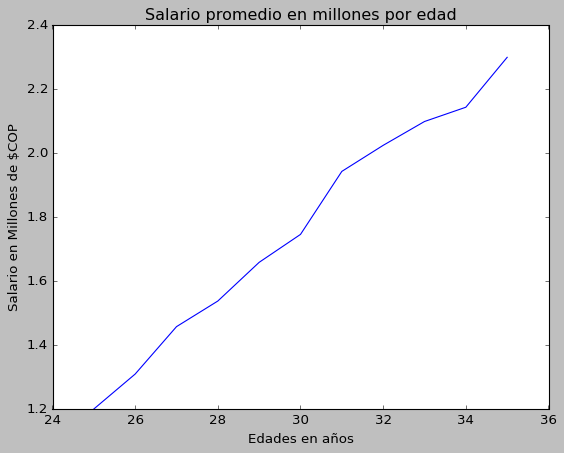

In [0]:
plt.style.use('classic')
plt.plot(ages,dev_y)
plt.xlabel('Edades en años')
plt.ylabel('Salario en Millones de $COP')
plt.title('Salario promedio en millones por edad')
plt.show()

Ahora nuestra gráfica es ilustrable, repasemos qué hemos hecho hasta ahora: `matplotlib.pyplot` nos permite agregar 2 objetos iterables como listas siempre y cuando sean de la misma longitud para graficar mis datos. Agreguemos otra curva a nuestra gráfica.

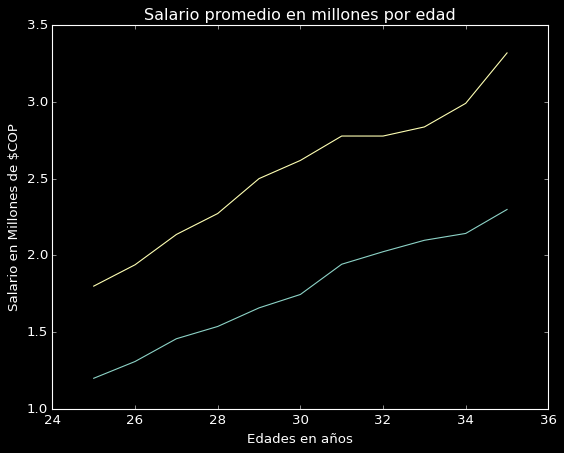

In [0]:
py_dev_y = [1.8       , 1.93901084, 2.13633959, 2.27269241, 2.49997355,
            2.61827559, 2.77716213, 2.77704311, 2.83639249, 2.99008199,
            3.3181698 ]

plt.style.use('dark_background')
plt.plot(ages,dev_y)
plt.plot(ages,py_dev_y)
plt.xlabel('Edades en años')
plt.ylabel('Salario en Millones de $COP')
plt.title('Salario promedio en millones por edad')
plt.show()

Nuevamente tenemos el mismo problema, quien haya desarrollado la gráfica, puede que sepa qué corresponde a qué, pero una persona que vea la gráfica de buenas a primeras quedará un poco en el aire, para esto podemos agregar etiquetas a cada una de las curvas por separado.

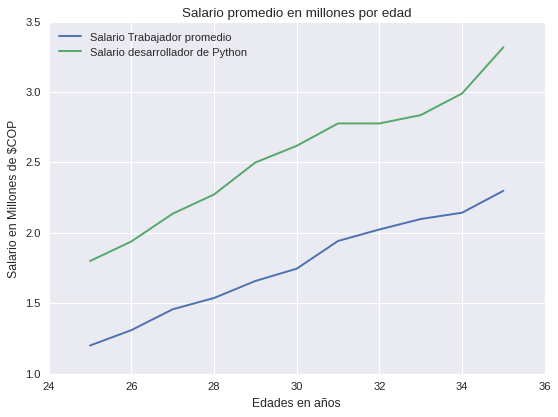

In [0]:
plt.style.use('seaborn')
plt.plot(ages,dev_y, label = 'Salario Trabajador promedio')
plt.plot(ages,py_dev_y, label = 'Salario desarrollador de Python')
plt.xlabel('Edades en años')
plt.ylabel('Salario en Millones de $COP')
plt.title('Salario promedio en millones por edad')
plt.legend(loc='upper left')
plt.show()

Finalmente podemos agregar otras características sobre las curvas con el fin de tener diferenciación sobre ellas.

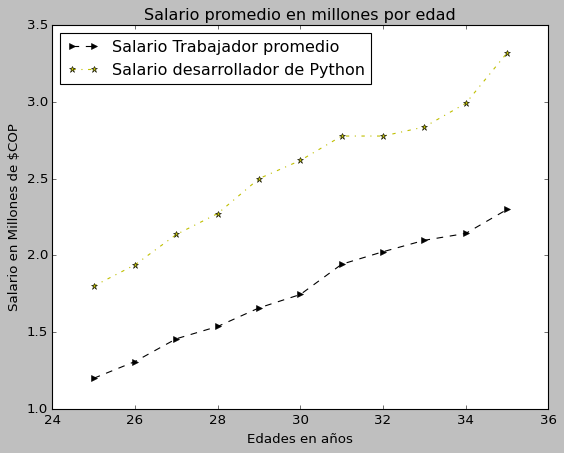

In [0]:
plt.style.use('classic')
plt.plot(ages,dev_y, 'k>--', label = 'Salario Trabajador promedio')
plt.plot(ages,py_dev_y, 'y*-.', label = 'Salario desarrollador de Python')
plt.xlabel('Edades en años')
plt.ylabel('Salario en Millones de $COP')
plt.title('Salario promedio en millones por edad')
plt.legend(loc='upper left')
plt.show()

Podemos guardar la figura con el comando `plt.savefig()` dándole como argumento la ruta y el nombre con el que deseamos guardar la imagen. Es importante recordar darle el formato de guardado de la siguiente forma.

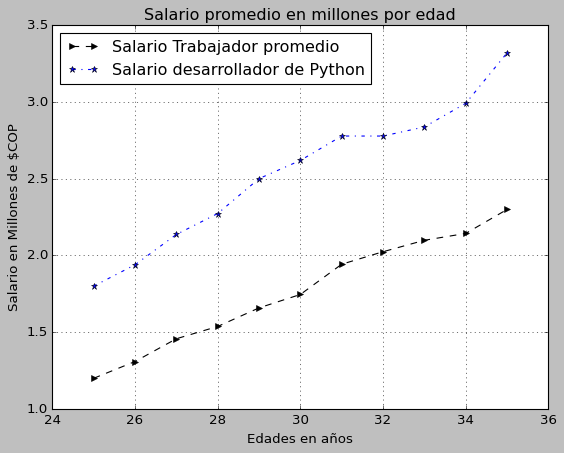

In [0]:
plt.plot(ages,dev_y, 'k>--', label = 'Salario Trabajador promedio')
plt.plot(ages,py_dev_y, 'b*-.', label = 'Salario desarrollador de Python')
plt.xlabel('Edades en años')
plt.ylabel('Salario en Millones de $COP')
plt.title('Salario promedio en millones por edad')
plt.legend(loc='upper left')
plt.grid(True)
plt.savefig('Ejemplo_de_clase.png')
plt.show()

In [0]:
'''
plt.xkcd() 
plt.plot(ages,dev_y, 'k>--', label = 'Salario Trabajador promedio')
plt.plot(ages,py_dev_y, 'y*-.', label = 'Salario desarrollador de Python')
plt.xlabel('Edades en años')
plt.ylabel('Salario en Millones de $COP')
plt.title('Salario promedio en millones por edad')
plt.legend(loc='upper left')
plt.show()
'''
#La sección de código anterior es una suerte de Easter-Egg, genera la gráfica que encuentra acontinuación

"\nplt.xkcd() \nplt.plot(ages,dev_y, 'k>--', label = 'Salario Trabajador promedio')\nplt.plot(ages,py_dev_y, 'y*-.', label = 'Salario desarrollador de Python')\nplt.xlabel('Edades en años')\nplt.ylabel('Salario en Millones de $COP')\nplt.title('Salario promedio en millones por edad')\nplt.legend(loc='upper left')\nplt.show()\n"

##Histogramas

Podemos hacer en lugar de una curva un diagrama de barras o histogramas, en principio se sigue una sitaxis bastante similar a la usada para graficar curvas, solo que en lugar de usar `plt.plot()` usaremos `plt.bar()`

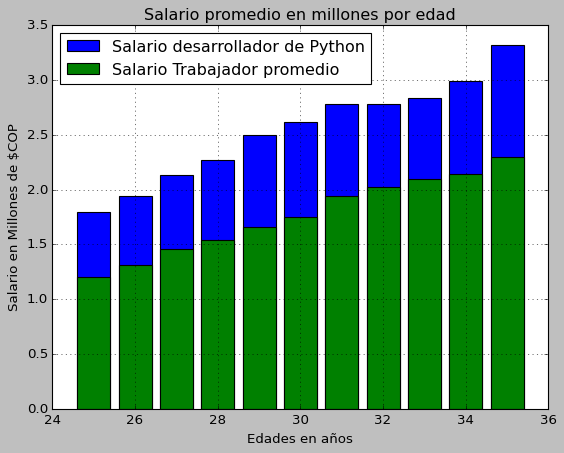

In [0]:
plt.style.use('classic')
plt.bar(ages,py_dev_y, label = 'Salario desarrollador de Python')
plt.bar(ages,dev_y, label = 'Salario Trabajador promedio')
plt.xlabel('Edades en años')
plt.ylabel('Salario en Millones de $COP')
plt.title('Salario promedio en millones por edad')
plt.legend(loc='upper left')
plt.grid(True)
plt.show()

Esto puede ser problemático, podríamos tener problemas con este tipo de graficado, lo mejor sería intentar correr un poco las barras. paraello nos serviremos de numpy.

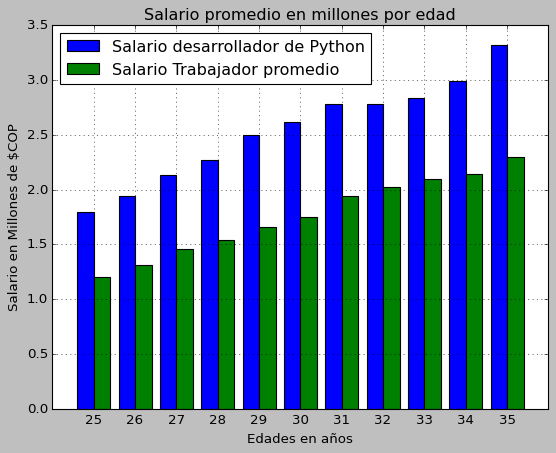

In [0]:
x_values = np.array(ages)
width = 0.4
sep =0.2

plt.bar(x_values-sep,py_dev_y,width=width, label = 'Salario desarrollador de Python')
plt.bar(x_values+sep,dev_y,width=width, label = 'Salario Trabajador promedio')
plt.xlabel('Edades en años')
plt.ylabel('Salario en Millones de $COP')
plt.xticks(ticks=ages)
plt.title('Salario promedio en millones por edad')
plt.legend(loc='upper left')
plt.grid(True)
plt.show()

Dependiendo de la cantidad de barras y cada cuánto haya una debemos configurar el grosor y su separación como acabamos de ver.

Hagamos un siguiente ejemplo un poco más diferente, ahora consideremos datos sobre cantidad de personas que realizanun deporte determinado:

In [0]:
sports = ['Ultimate','Rugby','Natación','Boleybol','Basebol','Patinaje','Ciclismo','Baloncesto','Atletismo','Futbol']
cant = np.sort(np.array([np.random.randint(10,100)for i in range(10)]))

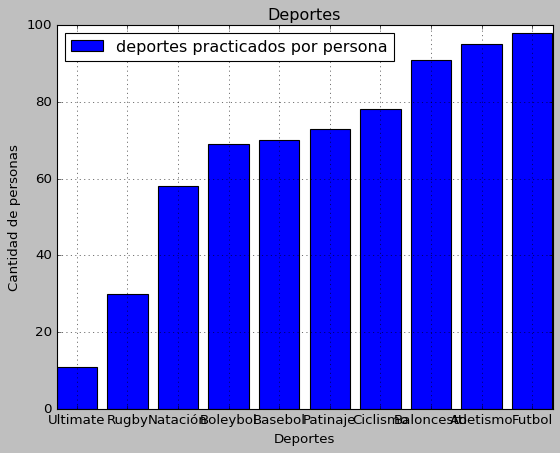

In [0]:
plt.bar(sports,cant,label = 'deportes practicados por persona')
plt.xlabel('Deportes')
plt.ylabel('Cantidad de personas')
#plt.xticks(ticks=ages)
plt.title('Deportes')
plt.legend(loc='upper left')
plt.grid(True)
plt.show()

Nuevamente volvemos a tener problemas. Las etiquetas parecen solaparse, esto puede solucionarse cambiando el tipo de gráfica de `bar` a `barh`. Esto cambiará los ejes y generará 

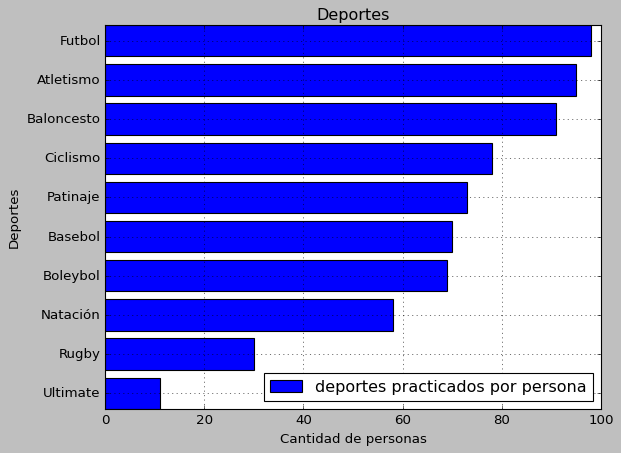

In [0]:
plt.barh(sports,cant,label = 'deportes practicados por persona')
plt.ylabel('Deportes')
plt.xlabel('Cantidad de personas')
#plt.xticks(ticks=ages)
plt.title('Deportes')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()

##Subgráficas

Consideremos el caso ahora en el que deseamos hacer varias gráficas por separado. Podemos aprovechar el método `subplot` para esto, este nos permite llevar a cabo varias gráficas (o diagramas) en el mismo cuadro

In [0]:
x = np.arange(-10,10,0.1)
y2 = np.array(x**2)
y3 = np.array(x**3)
y4 = np.array(x**4)
y5 = np.array(x**5)

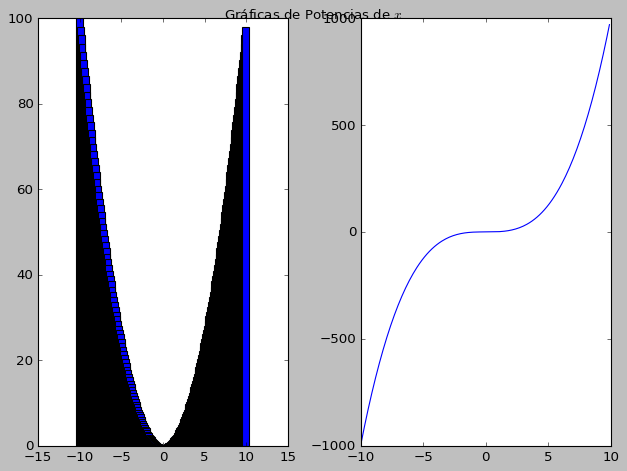

In [0]:
fig, axs = plt.subplots(1,2)
fig.suptitle('Gráficas de Potencias de $x$')
axs[0].bar(x, y2)
axs[1].plot(x, y3)
plt.tight_layout()
plt.show()

Bien podríamos cambiar que no estuvieran acumuladas horizontalmente sino de manera vertical cambiando los argumentos de `subplot`. 

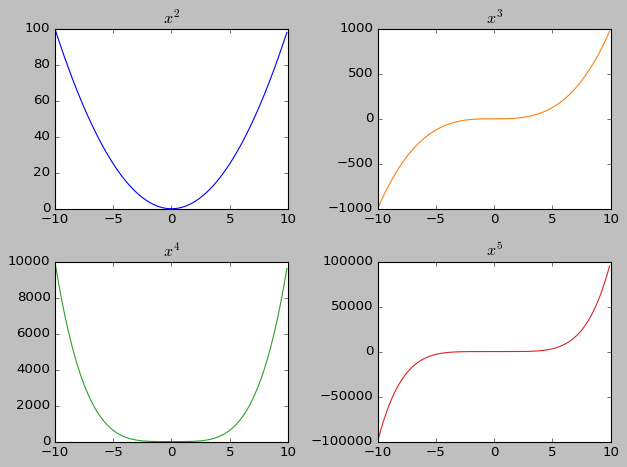

In [0]:
fig, axs = plt.subplots(2, 2)
axs[0, 0].plot(x, y2)
axs[0, 0].set_title('$x^2$')
axs[0, 1].plot(x, y3, 'tab:orange')
axs[0, 1].set_title('$x^3$')
axs[1, 0].plot(x, y4, 'tab:green')
axs[1, 0].set_title('$x^4$')
axs[1, 1].plot(x, y5, 'tab:red')
axs[1, 1].set_title('$x^5$')
plt.tight_layout()


# Hide x labels and tick labels for top plots and y ticks for right plots.
#for ax in axs.flat:
#    ax.label_outer()

##Coordenadas Polares

Matplolib nos permite realizar gráficos en coordenadas polares. Pensemosen un ejemplo sencillo para ilustrar lo siguiete:

In [0]:
r = np.arange(0, 2, 0.01)
theta = 2 * np.pi * r

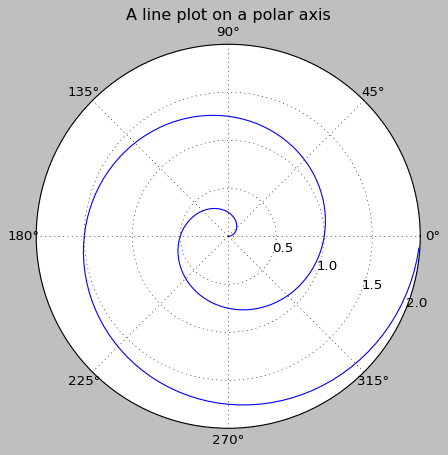

In [0]:
ax = plt.subplot( projection='polar')
ax.plot(theta, r)
ax.set_rmax(2)
ax.set_rticks([0.5, 1, 1.5, 2])  # Less radial ticks
ax.set_rlabel_position(-22.5)  # Move radial labels away from plotted line
ax.grid(True)

ax.set_title("A line plot on a polar axis")
plt.show()

##Gráficas 3D

Entre varias cosas podemos hacer plots de curvas 3 dimensionales. La sintaxis base, para graficar el "fondo" en el que visualizaremos nuestra gráfica es:

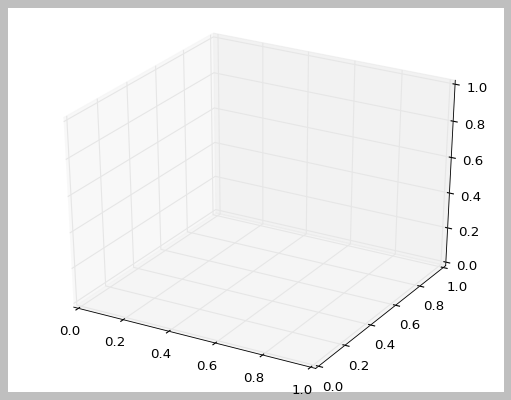

In [0]:
fig = plt.figure()
ax = plt.axes(projection='3d')

Ahora, es posible llenarlo con una curva en específico, supongamos la curva helicoide caracterizada porla parametrización

\begin{align}
x = \cos(\theta)\\
y = \sin(\theta)\\
z = \theta
\end{align}

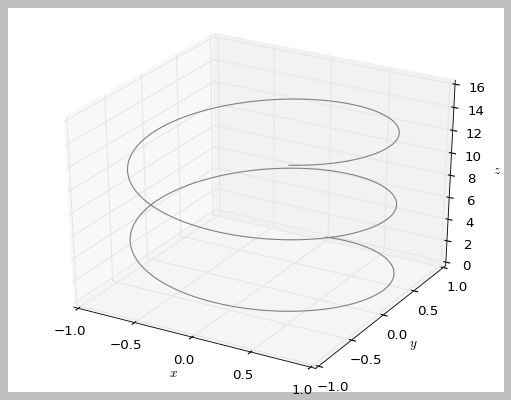

In [0]:
ax = plt.axes(projection='3d')

# Data for a three-dimensional line
zline = np.linspace(0, 15, 1000)
xline = np.sin(zline)
yline = np.cos(zline)
ax.plot3D(xline, yline, zline, 'gray')
ax.set_xlabel('$x$')
ax.set_ylabel('$y$')
ax.set_zlabel('$z$')
plt.show()

# Combinar Series o DataFrames

En muchos casos luego de algún tipo de procesamiento es necesario combinar, agregar, juntar o concatenar varias Series o DataFrames para obtener un cuadro de datos final. 

El módulo de pandas proporciona varias facilidades para combinar fácilmente Series o DataFrame con varios tipos de lógica de conjunto para los índices (o multi índices) y la funcionalidad de álgebra relacional en el caso de operaciones de tipo unión/fusión.


## Append o Concat

El primer caso que vamos a estudiar es tener varios conjuntos de datos con exactamente las mismas columnas pero los mismos o distintos índices. Por ejemplo:

In [0]:
path_to_file = "https://github.com/diplomado-bigdata-machinelearning-udea/curso0/blob/master/s07/Tasa_de_Cambio_Representativa_del_Mercado-_TRM.xlsx?raw=True"
TMR = pd.read_excel(path_to_file, sheet_name=None)

In [0]:
for k,v in TMR.items():
  print(k)
  print(v.head())

Enero
      VALOR UNIDAD VIGENCIADESDE VIGENCIAHASTA
0  3,258.84    COP    2020-01-03    2020-01-03
1  3,262.05    COP    2020-01-04    2020-01-07
2  3,264.26    COP    2020-01-08    2020-01-08
3  3,254.42    COP    2020-01-09    2020-01-09
4  3,253.89    COP    2020-01-10    2020-01-10
Febrero
      VALOR UNIDAD VIGENCIADESDE VIGENCIAHASTA
0  3,423.24    COP    2020-02-01    2020-02-03
1  3,401.56    COP    2020-02-04    2020-02-04
2  3,368.87    COP    2020-02-05    2020-02-05
3  3,355.44    COP    2020-02-06    2020-02-06
4  3,378.43    COP    2020-02-07    2020-02-07
Marzo
      VALOR UNIDAD VIGENCIADESDE VIGENCIAHASTA
0  3,512.17    COP    2020-03-03    2020-03-03
1  3,455.56    COP    2020-03-04    2020-03-04
2  3,458.45    COP    2020-03-05    2020-03-05
3  3,522.41    COP    2020-03-06    2020-03-06
4  3,584.58    COP    2020-03-07    2020-03-09
Abril
      VALOR UNIDAD VIGENCIADESDE VIGENCIAHASTA
0  4,054.54    COP    2020-04-01    2020-04-01
1  4,081.06    COP    2020-04-02  

En estos datos tenemos una hoja por cada mes, si queremos tener todos estos valores en un sólo DataFrame, es decir agregar filas tras filas, podriamos usar el método [`append()`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.append.html), el cual tiene en cuenta los índices 

In [0]:
df = pd.DataFrame([[1, 2], [3, 4]], columns=list('AB'))
df2 = pd.DataFrame([[5, 6], [7, 8]], columns=list('AB'))
df.append(df2)

,A,B
0,1,2
1,3,4
0,5,6
1,7,8


O podemos ignorar los índices y reoganizar



In [0]:
df.append(df2, ignore_index=True)

,A,B
0,1,2
1,3,4
2,5,6
3,7,8


También podemos usar este método para series:

In [0]:
s = pd.Series({"key1":1.0,"key2":2.0})
s.append(pd.Series({"key3":3.0,"key4":4.0}))

key1    1.0
key2    2.0
key3    3.0
key4    4.0
dtype: float64

Sin embargo a pesar de que `append()` es un método simple para hacer lo que deseamos, unir todas nuestras filas, es bastante limitado (y a veces lento) en comparación de [`pd.concat()`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.concat.html#pandas.concat) 

In [0]:
from time import clock

start = clock()
TMR = pd.read_excel(path_to_file, sheet_name=None)
tmr2020_v1 = TMR['Enero'].copy()
for k,v in TMR.items():
  if k!='Enero':
    tmr2020_v1 = tmr2020_v1.append(TMR[k].copy(),ignore_index=True)
print("El tiempo de ejecución es: %.4f segundos"%(clock()-start))

El tiempo de ejecución es: 0.0269 segundos


In [0]:
start = clock()
tmr2020_v2 = pd.concat(list(pd.read_excel(path_to_file, sheet_name=None).values()),ignore_index=True)
print("El tiempo de ejecución es: %.4f segundos"%(clock()-start))

El tiempo de ejecución es: 0.0257 segundos


## Concatenar
Como vimos el la sección anterior en muchos casos es preferible concatenar, para ello tenemos:
```python
pandas.concat(objs, #sequence or mapping of Series or DataFrame objects
              axis=0, 
              join='outer', 
              ignore_index: bool = False, 
              keys=None, 
              levels=None, 
              names=None, 
              verify_integrity: bool = False, 
              sort: bool = False, 
              copy: bool = True) → DataFramme o Series
```


### Caso 1. Juntando tabla tras tabla (axis = 0)
<center>

![1](https://pandas.pydata.org/pandas-docs/stable/_images/merging_concat_basic.png)

</center>

In [0]:
tmrdict = pd.read_excel(path_to_file, sheet_name=None)
tmr2020 = pd.concat(tmrdict.values(),ignore_index=True)
tmr2020

,VALOR,UNIDAD,VIGENCIADESDE,VIGENCIAHASTA
0,"3,258.84",COP,2020-01-03,2020-01-03
1,"3,262.05",COP,2020-01-04,2020-01-07
2,"3,264.26",COP,2020-01-08,2020-01-08
3,"3,254.42",COP,2020-01-09,2020-01-09
4,"3,253.89",COP,2020-01-10,2020-01-10
...,...,...,...,...
80,"3,990.10",COP,2020-05-05,2020-05-05
81,"3,926.07",COP,2020-05-06,2020-05-06
82,"3,961.66",COP,2020-05-07,2020-05-07
83,"3,924.54",COP,2020-05-08,2020-05-08


### Caso 2. Juntando tablas tras tabla (axis = 0) pero usando una clave

<center>

![2](https://pandas.pydata.org/pandas-docs/stable/_images/merging_concat_keys.png)

---



</center>

In [0]:
tmr2020 = pd.concat(tmrdict) #pd.concat(tmrdict.values(),keys=tmrdict.keys())
tmr2020

VALOR UNIDAD VIGENCIADESDE VIGENCIAHASTA
Enero 0  3,258.84    COP    2020-01-03    2020-01-03
      1  3,262.05    COP    2020-01-04    2020-01-07
      2  3,264.26    COP    2020-01-08    2020-01-08
      3  3,254.42    COP    2020-01-09    2020-01-09
      4  3,253.89    COP    2020-01-10    2020-01-10
...           ...    ...           ...           ...
Mayo  1  3,990.10    COP    2020-05-05    2020-05-05
      2  3,926.07    COP    2020-05-06    2020-05-06
      3  3,961.66    COP    2020-05-07    2020-05-07
      4  3,924.54    COP    2020-05-08    2020-05-08
      5  3,882.27    COP    2020-05-09    2020-05-11

[85 rows x 4 columns]

In [0]:
#DataFrame Multi-index 
tmr2020.loc['Febrero']

,VALOR,UNIDAD,VIGENCIADESDE,VIGENCIAHASTA
0,"3,423.24",COP,2020-02-01,2020-02-03
1,"3,401.56",COP,2020-02-04,2020-02-04
2,"3,368.87",COP,2020-02-05,2020-02-05
3,"3,355.44",COP,2020-02-06,2020-02-06
4,"3,378.43",COP,2020-02-07,2020-02-07
5,"3,408.35",COP,2020-02-08,2020-02-10
6,"3,440.96",COP,2020-02-11,2020-02-11
7,"3,432.89",COP,2020-02-12,2020-02-12
8,"3,394.80",COP,2020-02-13,2020-02-13
9,"3,385.11",COP,2020-02-14,2020-02-14


### Caso 3. Juntando tablas por columnas (axis = 1)

<center>

![3](https://pandas.pydata.org/pandas-docs/stable/_images/merging_concat_axis1.png)

</center>

Usemos el conjunto de datos [viviendas de California](https://developers.google.com/machine-learning/crash-course/california-housing-data-description)

In [0]:
import random
p = 0.01
data = pd.read_csv("/content/sample_data/california_housing_train.csv",
                   skiprows=lambda i: i>0 and random.random() > p)
data.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,148.000000,148.000000,148.000000,148.000000,148.000000,148.000000,148.000000,148.000000,148.000000
mean,-119.707365,35.710676,29.736486,2275.770270,480.898649,1225.040541,446.824324,3.859875,217931.824324
std,2.029856,2.245375,13.091702,1470.287427,347.527980,741.180781,311.711377,2.006837,125872.896212
min,-124.190000,32.740000,2.000000,22.000000,7.000000,55.000000,7.000000,0.951300,49500.000000
25%,-121.992500,33.965000,19.000000,1404.000000,283.750000,777.000000,279.000000,2.418775,119200.000000
50%,-118.595000,34.275000,27.500000,1886.000000,386.000000,1001.500000,358.500000,3.563500,190700.000000
75%,-118.117500,37.712500,41.250000,2749.250000,541.750000,1528.750000,514.000000,5.218525,282900.000000
max,-116.440000,41.310000,52.000000,11154.000000,2138.000000,4533.000000,1844.000000,11.560900,500001.000000


In [0]:
data_mean = data.groupby(["housing_median_age"]).mean()[['total_rooms','total_bedrooms','population']] 
data_max = data.groupby(["housing_median_age"]).max()[['population','median_income','median_house_value']]
data_max =  data_max[data_max['median_income'] > data_max['median_income'].mean()]

In [0]:
data_mean.head()

,total_rooms,total_bedrooms,population
housing_median_age,,,
2.0,2411.00,354.00,703.0
4.0,3273.00,495.00,1497.0
5.0,4718.00,1140.00,2564.0
7.0,1972.00,352.00,964.0
8.0,2450.25,497.25,1198.5


In [0]:
data_max.head()

,population,median_income,median_house_value
housing_median_age,,,
2.0,703.0,7.8061,331400.0
4.0,1497.0,5.3345,176100.0
8.0,1555.0,6.0901,298200.0
14.0,3136.0,6.7093,400000.0
16.0,1873.0,6.5006,282500.0


In [0]:
pd.concat([data_mean.head(),data_max.head()],axis=1)

,total_rooms,total_bedrooms,population,population,median_income,median_house_value
housing_median_age,,,,,,
2.0,2411.00,354.00,703.0,703.0,7.8061,331400.0
4.0,3273.00,495.00,1497.0,1497.0,5.3345,176100.0
5.0,4718.00,1140.00,2564.0,NaN,NaN,NaN
7.0,1972.00,352.00,964.0,NaN,NaN,NaN
8.0,2450.25,497.25,1198.5,1555.0,6.0901,298200.0
14.0,NaN,NaN,NaN,3136.0,6.7093,400000.0
16.0,NaN,NaN,NaN,1873.0,6.5006,282500.0


### Caso 4. Intercentando entre columnas

<center>

![4](https://pandas.pydata.org/pandas-docs/stable/_images/merging_concat_axis1_inner.png)

</center>


In [0]:
pd.concat([data_mean,data_max],axis=1,join='inner',keys=['Means','Max'])

Means                 ...           Max                   
                    total_rooms total_bedrooms  ... median_income median_house_value
housing_median_age                              ...                                 
2.0                 2411.000000     354.000000  ...        7.8061           331400.0
4.0                 3273.000000     495.000000  ...        5.3345           176100.0
8.0                 2450.250000     497.250000  ...        6.0901           298200.0
14.0                3630.400000     787.400000  ...        6.7093           400000.0
16.0                2201.333333     391.833333  ...        6.5006           282500.0
17.0                2356.222222     504.888889  ...        5.8747           373400.0
18.0                1696.333333     308.000000  ...        5.5955           217700.0
22.0                2470.166667     448.833333  ...        8.3637           500001.0
23.0                4680.600000     786.600000  ...       10.1675           500001.0
25.0                3139.333333     879.500000  ...        5.3508           410000.0
26.0                2934.833333     752.000000  ...        6.7395           342800.0
27.0                2779.000000     483.600000  ...        9.3125           293500.0
34.0                1639.000000     365.250000  ...        8.7382           500001.0
35.0                1220.333333     252.333333  ...        9.0812           500001.0
37.0                3494.000000     788.500000  ...        7.2988           500001.0
41.0                1405.666667     323.666667  ...        6.0150           488500.0
43.0                1443.500000     312.000000  ...        5.5289           297700.0
44.0                1432.857143     309.142857  ...        5.3970           500000.0
46.0                1255.666667     285.333333  ...        5.3264           384700.0
48.0                1817.000000     288.500000  ...        8.7051           500001.0
52.0                1889.833333     342.583333  ...       11.5609           500001.0

[21 rows x 6 columns]

### Caso 5. Concatenenado entre DataFrames y Series


```python
s1 = pd.Series(['X0', 'X1', 'X2', 'X3'], name='X')
result = pd.concat([df1, s1], axis=1)
```
<center>

![5](https://pandas.pydata.org/pandas-docs/stable/_images/merging_concat_mixed_ndim.png)
</center>

```python
result = pd.concat([df1, s2, s2, s2], axis=1)
```
<center>

![5](https://pandas.pydata.org/pandas-docs/stable/_images/merging_concat_unnamed_series.png)

</center>

```python
result = pd.concat([df1, s1], axis=1, ignore_index=True)
```

<center>

![5](https://pandas.pydata.org/pandas-docs/stable/_images/merging_concat_series_ignore_index.png)

</center>


## Fusionar y unir

Fusionar o unir son operaciones un poco más complejas en donde se usa algebra relacional, para esto tenemos:

* [`pd.merge()`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.merge.html#pandas.DataFrame.merge)


```python
pd.merge(left, right, how='inner', on=None, left_on=None, right_on=None,
         left_index=False, right_index=False, sort=True, suffixes=('_x', '_y'),
         copy=True, indicator=False, validate=None)
```

* [`DataFrame.join()`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.join.html#pandas.DataFrame.join)


```python
DataFrame.join(self, other, on=None, how='left', lsuffix='', rsuffix='', sort=False))
```


### Algebra relacional
Un usuario que ha trabajado con bases de datos SQL estará familiarizado con la terminología utilizada para determinar la unión de las estructuras, pero revisemos:

* one-to-one: Por ejemplo unir dos DataFrame en sus índices (que deben contener valores únicos).
* many-to-one: Por ejemplo cuando se une un índice (único) a uno o más columnas en un DataFrame diferente.
* many-to-many: Unir columnas en columnas. 

Aquí un ejemplo:

<center>

![a](https://pandas.pydata.org/pandas-docs/stable/_images/merging_merge_on_key.png)
</center>

###Tipos de fusión many-to-many

La función merge tiene un argumento (`how`) para definir cuales van a ser los valores (llaves) que se incluiran en las tablas resultantes. Usando diferentes valores tendríamos diferentes resultados: 


In [0]:
left = pd.DataFrame({'key1': ['K0', 'K0', 'K1', 'K2'],
                     'key2': ['K0', 'K1', 'K0', 'K1'],
                     'A': ['A0', 'A1', 'A2', 'A3'],
                     'B': ['B0', 'B1', 'B2', 'B3']})

right = pd.DataFrame({'key1': ['K0', 'K1', 'K1', 'K2'],
                      'key2': ['K0', 'K0', 'K0', 'K0'],
                      'C': ['C0', 'C1', 'C2', 'C3'],
                      'D': ['D0', 'D1', 'D2', 'D3']}) 



In [0]:
pd.merge(left, right, how='left', on=['key1', 'key2'],indicator="ind_col")

,key1,key2,A,B,C,D,ind_col
0,K0,K0,A0,B0,C0,D0,both
1,K0,K1,A1,B1,NaN,NaN,left_only
2,K1,K0,A2,B2,C1,D1,both
3,K1,K0,A2,B2,C2,D2,both
4,K2,K1,A3,B3,NaN,NaN,left_only


![texto alternativo](https://pandas.pydata.org/pandas-docs/stable/_images/merging_merge_on_key_left.png)

In [0]:
pd.merge(left, right, how='right', on=['key1', 'key2'],indicator="ind_col")

,key1,key2,A,B,C,D,ind_col
0,K0,K0,A0,B0,C0,D0,both
1,K1,K0,A2,B2,C1,D1,both
2,K1,K0,A2,B2,C2,D2,both
3,K2,K0,NaN,NaN,C3,D3,right_only


![texto alternativo](https://pandas.pydata.org/pandas-docs/stable/_images/merging_merge_on_key_right.png)

In [0]:
pd.merge(left, right, how='outer', on=['key1', 'key2'],indicator="ind_col")

,key1,key2,A,B,C,D,ind_col
0,K0,K0,A0,B0,C0,D0,both
1,K0,K1,A1,B1,NaN,NaN,left_only
2,K1,K0,A2,B2,C1,D1,both
3,K1,K0,A2,B2,C2,D2,both
4,K2,K1,A3,B3,NaN,NaN,left_only
5,K2,K0,NaN,NaN,C3,D3,right_only


In [0]:
pd.merge(left, right, how='inner', on=['key1', 'key2'],indicator="ind_col")

,key1,key2,A,B,C,D,ind_col
0,K0,K0,A0,B0,C0,D0,both
1,K1,K0,A2,B2,C1,D1,both
2,K1,K0,A2,B2,C2,D2,both


### Columnas duplicadas 

En los casos más reales podemos unir alrededor de una columna pero sin sobreescribir los demás datos, por ejemplo:
```python
result = pd.merge(left, right, on='B', how='outer')
```

![texto alternativo](https://pandas.pydata.org/pandas-docs/stable/_images/merging_merge_on_key_dup.png)




In [0]:
left = pd.DataFrame({'A': [1, 2], 'B': [2, 2]})
right = pd.DataFrame({'A': [4, 5, 6], 'B': [2, 3, 2]})
pd.merge(left, right, on='B', how='outer',indicator='ind_col',suffixes=("_left","_right"))

,A_left,B,A_right,ind_col
0,1.0,2,4,both
1,1.0,2,6,both
2,2.0,2,4,both
3,2.0,2,6,both
4,NaN,3,5,right_only


###Unir índices

Para este tipo de operaciones podemos usar `join()` el cual usa merge debajo y tiene la relación:

```python
left.join(right, on=key_or_keys)
pd.merge(left, right, left_on=key_or_keys, right_index=True,
      how='left', sort=False)
```

Puede usar `pd.merge()` en su lugar pero en uniones one-to-one y many-to-one usar `DataFrame.join()` puede ser más conveniente. Aquí un ejemplo simple:

`result = left.join(right, how=left)`

<center>

![](https://pandas.pydata.org/pandas-docs/stable/_images/merging_join.png)

</center>

`result = left.join(right, how='outer')`

<center>

![](https://pandas.pydata.org/pandas-docs/stable/_images/merging_join_outer.png)

</center>

`result = left.join(right, how='inner')`

<center>

![](https://pandas.pydata.org/pandas-docs/stable/_images/merging_join_inner.png)

</center>


In [0]:
left = pd.DataFrame({'A': ['A0', 'A1', 'A2'],
                     'B': ['B0', 'B1', 'B2']},
                     index=['K0', 'K1', 'K2']) 

right = pd.DataFrame({'C': ['C0', 'C2', 'C3'],
                      'D': ['D0', 'D2', 'D3']},
                      index=['K0', 'K2', 'K3'])

In [0]:
pd.merge(left, right, left_index=True, right_index=True, how='outer')

,A,B,C,D
K0,A0,B0,C0,D0
K1,A1,B1,NaN,NaN
K2,A2,B2,C2,D2
K3,NaN,NaN,C3,D3


### Unir columnas en un índice

`result = left.join(right, on='key')`
<center>

![texto alternativo](https://pandas.pydata.org/pandas-docs/stable/_images/merging_join_key_columns.png)
</center>

In [0]:
left = pd.DataFrame({'A': ['A0', 'A1', 'A2', 'A3'],
                     'B': ['B0', 'B1', 'B2', 'B3'],
                     'key': ['K0', 'K1', 'K0', 'K1']}) 

right = pd.DataFrame({'C': ['C0', 'C1'],
                      'D': ['D0', 'D1']},
                      index=['K0', 'K1'])

In [0]:
pd.merge(left, right, left_on='key', right_index=True, how='left', sort=False)

,A,B,key,C,D
0,A0,B0,K0,C0,D0
1,A1,B1,K1,C1,D1
2,A2,B2,K0,C0,D0
3,A3,B3,K1,C1,D1


### Columnas duplicadas y varios DataFrames

En el caso de `join()`también tenemos opciones para identificar las columnas duplicadas y además es posible juntar varios DataFrames (muy similar a concatenar)

In [0]:
left = pd.DataFrame({'v': [1, 2, 3]}, index=['K0', 'K1', 'K2'])
right = pd.DataFrame({'v': [4, 5, 6]},index=['K0', 'K0', 'K3'])
right2 = pd.DataFrame({'v1': [7, 8, 9]}, index=['K1', 'K1', 'K2'])
right3 = pd.DataFrame({'v2': [10, 11, 12]}, index=['K1', 'K2', 'K3'])

In [0]:
left.join(right, lsuffix='_left', rsuffix='_right')

,v_left,v_right
K0,1,4.0
K0,1,5.0
K1,2,NaN
K2,3,NaN


In [0]:
left.join([right,right2,right3],how='outer')

,v_x,v_y,v1,v2
K0,1.0,4.0,NaN,NaN
K0,1.0,5.0,NaN,NaN
K1,2.0,NaN,7.0,10.0
K1,2.0,NaN,8.0,10.0
K2,3.0,NaN,9.0,11.0
K3,NaN,6.0,NaN,12.0


## Ejercicio

Se tiene la información de un conjunto de datos de un Banco en Perú, no hay descripción del conjunto de datos ya que la intención es recrear cierta situación en medio de un concurso simple.

En este caso sólo usaremos lo que hemos aprendido sobre fusión y combinación de datos para dar con algunas conclusiones. Los datasets son:

* Información sociodemografica de "posibles" clientes.
* Información de contacto en campañas de captación de clientes.
* Información de clientes actuales del banco. 

In [0]:
posibles_clientes = pd.read_csv("https://raw.githubusercontent.com/diplomado-bigdata-machinelearning-udea/curso0/master/s08/datasets/posibles_clientes.csv")
clientes = pd.read_csv("https://raw.githubusercontent.com/diplomado-bigdata-machinelearning-udea/curso0/master/s08/datasets/clientes.csv")
info_contacto = pd.read_csv("https://raw.githubusercontent.com/diplomado-bigdata-machinelearning-udea/curso0/master/s08/datasets/info_contacto.csv")

### Primer paso

**Relacione** todos los conjuntos de datos según el id del cliente. 


In [0]:
#@title Ver solución **aquí**

posibles_contactados = pd.merge(posibles_clientes,info_contacto,on='CODIGOCLIENTE',how='inner',suffixes=('_perfilado','_contacto'))
posibles_captados = pd.merge(posibles_clientes,clientes,on='CODIGOCLIENTE',how='inner',suffixes=("_perfilado","_entrada"))
contactados_captados =pd.merge(info_contacto,clientes,on='CODIGOCLIENTE',how='inner',suffixes=("_contacto","_entrada"))


### VAR_0061 ¿Probabilidad?

Generalmente los bancos en el contacto del posible cliente crean un valor de probabilidad sobre la posibilidad de que el cliente acceda al producto ofrecido por el canal adecuado gracias a su perfil (profesión, edad, ingresos, etc). Este valor también puede ser una probabilidad de negativa.

Limpie los clientes que no tienen este valor y revise en los contactados captados que porcetaje tuvo un valor `VAR_0061` mayor al 0.7, seleccionado tiempos, el código del cliente y el segmento de captación. Haga lo mismo con valores menores a 0.3. ¿Es una probabilidad positiva o negativa? Use `DatFrame.plot.hist(bins=50)`, en la selección de los datos de `VAR_0061` sin `NaN`.

Una vez determine que tipo de probabilidad es, selecciones adecuadamente. 

 



In [0]:
#@title Ver solución **aquí**

var_61_pos = contactados_captados[contactados_captados['VAR_0061']>=0.7][['CODIGOCLIENTE','MES_contacto','MES_entrada','SEGMENTO_CAPTACIONES']]
#print(var_61_pos.count())
var_61_neg = contactados_captados[contactados_captados['VAR_0061']>=0.3][['CODIGOCLIENTE','MES_contacto','MES_entrada','SEGMENTO_CAPTACIONES']]
#print(var_61_neg.count())
#contactados_captados[contactados_captados['VAR_0061'].notna()]['VAR_0061'].plot.hist(bins=50)
var_61 = contactados_captados[contactados_captados['VAR_0061']<=0.6][['CODIGOCLIENTE','MES_contacto','MES_entrada','SEGMENTO_CAPTACIONES']]

Revise en este nuevo grupo cuales eran posibles clientes y agrupelos por profesión y segmento de captaciones. También por sexo y situación laboral, use count para agrupar, puede seleccionar el código para obtener series fáciles de ver. 



In [0]:
#@title Ver solución **aquí**

var_61_info = pd.merge(var_61,posibles_clientes,on='CODIGOCLIENTE',how='inner')
#print(var_61_info.groupby(['SEXO','SITUACION_LABORAL']).count()['CODIGOCLIENTE'])
#print(var_61_info.groupby(['PROFESION','SEGMENTO_CAPTACIONES']).count()['CODIGOCLIENTE'])

### Join con los códigos en index

Haga una copia de todos los datos en donde el código del cliente se vuelva en índice, una el conjunto clientes (donde nos quedaremos con el mes y el segmento canal) con contactados (donde nos quedaremos con el mes, var 57 y var 61) y posibles clientes (donde nos quedaremos con todo). ¿Cuántos clientes tenemos interceptados en estos tres grupos? 

In [0]:
#@title Ver solución **aquí**
p_client = posibles_clientes.set_index('CODIGOCLIENTE')
info_contact = info_contacto[['CODIGOCLIENTE','MES','VAR_0057','VAR_0061']].set_index('CODIGOCLIENTE')
clients = clientes[['CODIGOCLIENTE','MES','SEGMENTO_CANAL','SEGMENTO_CAPTACIONES']].set_index('CODIGOCLIENTE')
#p_client.join([info_contact,clients],how='inner')